In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df = pd.read_csv('ROP_Optimization_dataset.csv')
df.head()

,Measured Depth m,Weight on Bit kkgf,Average Rotary Speed rpm,Mud Flow In L/min,UCS,Rate of Penetration m/h
0,3008.8,4.4,217.60,2121.4,75.008535,19.2
1,3008.9,4.4,217.45,2121.4,75.360667,19.2
2,3009.0,4.4,217.45,2121.4,76.765259,19.2
3,3009.0,5.3,217.45,2121.4,78.064799,20.2
4,3009.1,5.3,217.45,2121.4,79.268783,20.2


In [9]:
df.describe()

,Measured Depth m,Weight on Bit kkgf,Average Rotary Speed rpm,Mud Flow In L/min,UCS,Rate of Penetration m/h
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,3179.229720,7.105248,245.995618,2089.524056,68.057816,23.868808
std,100.826728,1.658379,19.519014,38.996424,12.730072,8.389191
min,3008.800000,0.000000,216.880000,1855.600000,35.100764,2.100000
25%,3085.125000,6.400000,217.720000,2077.200000,60.658760,19.700000
50%,3191.750000,7.200000,254.320000,2077.200000,68.385591,21.300000
75%,3267.300000,8.300000,257.430000,2121.400000,76.116321,28.100000
max,3344.100000,10.300000,290.560000,2121.400000,100.552451,99.200000


<Axes: >

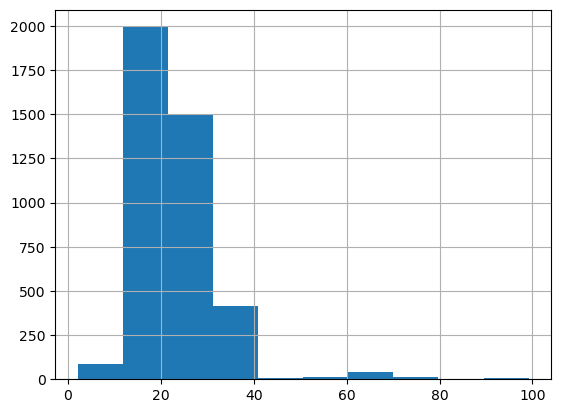

In [10]:
df.iloc[:,5].hist()

In [11]:
df1 = df.copy()
scaler_x = preprocessing.MinMaxScaler()
scaled_values = scaler_x.fit_transform(df1.iloc[:,:5])
df1.iloc[:,:5] = scaled_values

scaler_y = preprocessing.MinMaxScaler()
scaled_values_1 = scaler_y.fit_transform(np.array(df1.iloc[:,5]).reshape(-1,1))
df1.iloc[:,5] = scaled_values_1

In [12]:
model = Sequential()
model.add(Dense(20, input_dim=5))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

print(model.summary())

model.fit(df1.iloc[:,:5].to_numpy(),df1.iloc[:,5].to_numpy(), epochs=100, batch_size=20, verbose=1)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0909 - mae: 0.1912 - mse: 0.0909
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 0.0555 - mse: 0.0071
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - mae: 0.0513 - mse: 0.0069
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0502 - mse: 0.0072
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0489 - mse: 0.0066
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mae: 0.0506 - mse: 0.0072
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - mae: 0.0482 - mse: 0.0067
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - mae: 0.0499 - mse: 0.0066
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0491 - mse: 0.0065
Epoch 10/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - mae: 0.0506 - mse: 0.0065
Epoch 11/100
204/204 ━━━━━━━━━━━━━

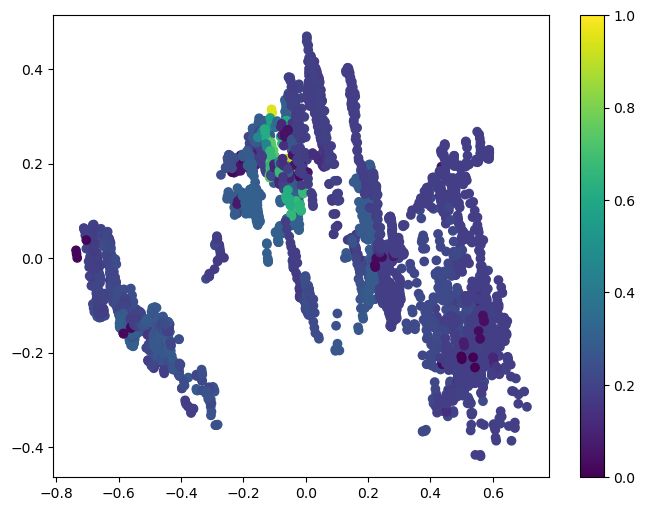

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(df1.iloc[:,:5].to_numpy())
x_pca = pca.transform(df1.iloc[:,:5].to_numpy())

plt.figure(figsize =(8, 6)) 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df1.iloc[:,5] , cmap ='viridis')
plt.colorbar()

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


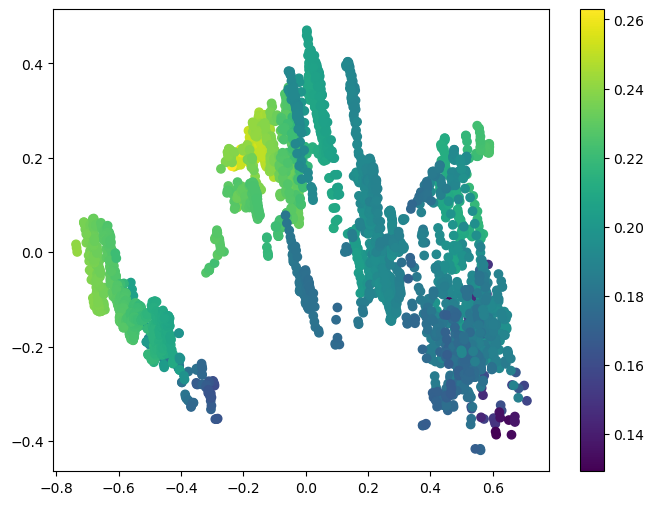

In [14]:
plt.figure(figsize =(8, 6)) 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = model.predict(df1.iloc[:,:5]) , cmap ='viridis')
plt.colorbar()

In [15]:
ucs = (51 - df.iloc[:,4].min())/(df.iloc[:,4].max()-df.iloc[:,4].min())
measured_depth = (3275 - df.iloc[:,0].min())/(df.iloc[:,0].max()-df.iloc[:,0].min())
# PSO algorithm is applied to find minimum vaue of ANN model for all x,y
n_particles = 20
X = np.random.rand(3, n_particles)
V = np.random.randn(3, n_particles) * 0.01

def pred(X_1):
    result = np.empty((0,), float)
    for i in range(20):
        data = np.array([[measured_depth, X[0,i], X[1,i], X[2,i], ucs]])  
        result = np.append(result, np.array([[model.predict(data)]]).reshape(-1), axis=0)
    return result

pbest = X
pbest_obj = pred(X)
gbest = pbest[:, pbest_obj.argmax()]
gbest_obj = pbest_obj.max()

c1 = c2 = 0.1
w = 0.8

def update():
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = pred(X)
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).max(axis=0)
    gbest = pbest[:, pbest_obj.argmax()]
    gbest_obj = pbest_obj.max()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


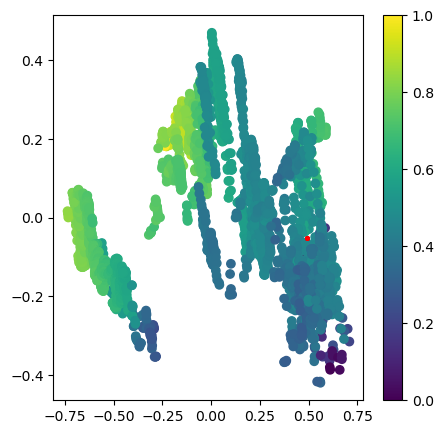

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [16]:
# minimum value of ANN calculated by PSO
from IPython.display import clear_output
import time

k=0
starttime = time.time()

while k<80:
    update()
    
    if k%4 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(5,5))
        plt.scatter(x_pca[:, 0], x_pca[:, 1], c = model.predict(df1.iloc[:,:5]) , cmap ='viridis')
        
        x_pca_1 = np.empty((0,2), float)
        for i in range(20):
            data_1 = np.array([[measured_depth, X[0,i], X[1,i], X[2,i], ucs]])
            x_pca_1 = np.append(x_pca_1, pca.transform(data_1) , axis=0)
         
        plt.scatter(x_pca_1[:, 0], x_pca_1[:, 1], color='red', s=5)
        plt.colorbar()    
        plt.show()
        time.sleep(0.1)
    k=k+1
    
    
print("PSO found best solution at f({})={}".format(scaler_x.inverse_transform(np.array([[measured_depth,gbest[0],gbest[1],gbest[2],ucs]]).reshape(1,-1)), 
                                                   scaler_y.inverse_transform(gbest_obj.reshape(1,-1))))
